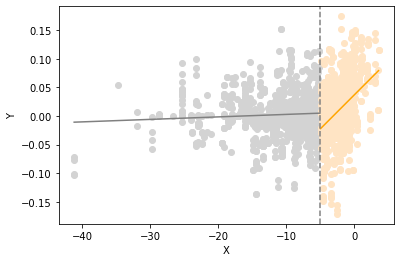

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

df_breakpoint = pd.read_csv('breakpoint.csv')

# 创建一个带有斜率突变的数据集（x和y都不是整数）
x = np.array(df_breakpoint['csbd'])
y = np.array(df_breakpoint['return'])
indices = np.argsort(x)
x = x[indices]
y = y[indices]

# 定义一个函数来估计断点
def breakpoint_regression(params):
    breakpoint, slope1, intercept1, slope2, intercept2 = params
    y_pred = np.piecewise(x, [x < breakpoint, x >= breakpoint], 
                          [lambda x: slope1 * x + intercept1, 
                           lambda x: slope2 * x + intercept2])
    return np.sum((y - y_pred)**2)

# 使用优化方法寻找断点和斜率
result = minimize(breakpoint_regression, [-5, 2, 0, 5, 0])

# 获取估计参数
breakpoint, slope1, intercept1, slope2, intercept2 = result.x

# 绘制结果
plt.scatter(x[x<breakpoint], y[x<breakpoint], c = 'lightgray')
plt.scatter(x[x>breakpoint], y[x>breakpoint], c = 'bisque')
plt.plot(x[x < breakpoint], slope1 * x[x < breakpoint] + intercept1, color='gray', label='Model 1')
plt.plot(x[x >= breakpoint], slope2 * x[x >= breakpoint] + intercept2, color='orange', label='Model 2')
plt.axvline(x=breakpoint, color='grey', linestyle='--', label=f'Breakpoint at x={breakpoint:.2f}')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('breakpoint.png',transparent = True)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     111.4
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           5.86e-47
Time:                        22:23:20   Log-Likelihood:                 4209.9
No. Observations:                2371   AIC:                            -8414.
Df Residuals:                    2368   BIC:                            -8397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0073      0.002     -3.428      0.0

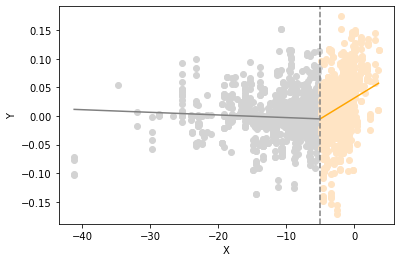

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


# 创建一个带有斜率突变的数据集（x和y都不是整数）
x = np.array(df_breakpoint['csbd'])
y = np.array(df_breakpoint['return'])
indices = np.argsort(x)
x = x[indices]
y = y[indices]

# 定义一个函数来拟合带有拐点的模型，确保拐点处连续
def fit_continuous_kinked_regression(x, y, kink):
    # 创建一个表示拐点效应的变量
    kink_effect = np.maximum(0, x - kink)
    
    # 拟合整个数据集
    x_with_const_and_kink = sm.add_constant(np.column_stack((x, kink_effect)))
    model = sm.OLS(y, x_with_const_and_kink).fit()

    return model

# 拟合模型
kink = -5
model = fit_continuous_kinked_regression(x, y, kink)
print(model.summary())

# 绘制结果
plt.scatter(x[x<-5], y[x<-5],c = 'lightgray', label='Data')
plt.scatter(x[x>-5], y[x>-5],c = 'bisque', label='Data')
plt.plot(x[x<-5], model.predict(sm.add_constant(np.column_stack((x, np.maximum(0, x - kink)))))[x<-5], color='gray', label='Fitted Model')
plt.plot(x[x>-5], model.predict(sm.add_constant(np.column_stack((x, np.maximum(0, x - kink)))))[x>-5], color='orange', label='Fitted Model')
plt.axvline(x=kink, color='grey', linestyle='--', label=f'Kink at x={kink}')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("kinked.png",transparent = True)
plt.show()
